In [1]:
import obspy, glob
import numpy as np
from obspy import Trace, UTCDateTime
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt
# import h5py
import matplotlib.dates as mdates
from matplotlib import cm
from datetime import datetime, date, timedelta
from scipy import signal
import numpy.matlib

In [5]:
def calib(data, S):
    return data / ((10)**(S/20)) * (10**(-6))

In [76]:
# path = '../Results/sound'
# file = f'{path}/Keelung_fish_chorus_061922652_downsampling.wav'

path = '/Users/tong/Documents/09_IONTU/Results/Detection_fishcall/99_tolisten'
file = f'{path}/Taoyuan_230822070001_399Hz.wav'

S = 0 #-176.1 # end to end 619194340_downsampling_lp.wav

In [77]:
rate

48000

In [78]:
rate, data = read(file)
data = data.astype(np.float32, order='C') / 32768.0
data = calib(data, S)

strtime = file.rsplit('.')[1]
mm = strtime[2:4]
dd = strtime[4:6]
hh = strtime[6:8]
print(mm,dd,hh)

tr = Trace()
tr.data = data
tr.stats.sampling_rate = rate
# tr = tr.slice(tr.stats.starttime, tr.stats.starttime)
tr = tr.filter('bandpass', freqmin=100, freqmax=1000, corners=4, zerophase=True)


v  


In [79]:
tr

... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:09.999990Z | 96000.0 Hz, 960000 samples

In [80]:


# rate, data = read(file)
# # audio_data = data.astype(np.float32, order='C') / 32768.0
# # calib_data = audio_data / ((10)**(S/20))
# data = calib(data, S)


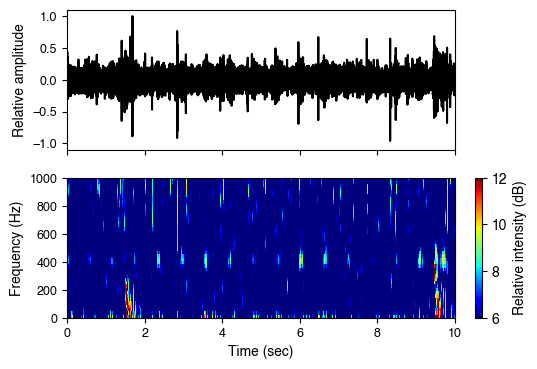

In [91]:
length = 256*6
f,t,P = signal.stft(tr.data, fs= tr.stats.sampling_rate, window='hann', 
                          nperseg=length, noverlap=int(0.9*length), nfft=4000, detrend='constant', boundary=None, padded=False)
data = 10*np.log10(np.abs(P)/np.power(1, 2)) #+ 176.2

axis=1
ambient = np.percentile(data, 20, axis=axis)
if axis==0:
    input_data = np.subtract(data, np.matlib.repmat(ambient, data.shape[axis], 1))
elif axis==1:
    input_data = np.subtract(data, np.matlib.repmat(ambient, data.shape[axis], 1).T)

#============= plot
#============= plot
#============= plot


# xmin = tr_cut.times()[0]; xmax = tr_cut.times()[-1]
# xmin = 1.25; xmax =1.55
xmin = 0; xmax=10
ylim = 1.1

fig, ax = plt.subplots(2,1, figsize=(5, 4), sharex=True)
plt.rcParams["font.family"] = "Helvetica"   
im1 = ax[1].imshow(input_data, vmin=6, vmax=12,
           origin='lower',  aspect='auto', cmap=cm.jet,
           extent=[t[0], t[-1], f[0], f[-1]], interpolation='none')
ax[1].set_ylabel('Frequency (Hz)', fontsize=10)
ax[1].set_xlabel('Time (sec)' , fontsize=10)
ax[1].set_ylim(0, 1000)
ax[1].set_xlim(xmin,xmax)
# ax[1].set_xticks(np.arange(xmin, xmax+0.01, 0.1))
# ax[1].set_xticklabels([0, 0.1,0.2,0.3,0.4,0.5,0.6])
ax[1].tick_params(axis='both', labelsize=9)
rect = [0.94, 0.11, 0.015, 0.35]
cbar_ax = fig.add_axes(rect)
plt.colorbar(im1, cax=cbar_ax, label = 'Relative intensity (dB)')

ax[0].plot(tr.times(), tr.data/ max(abs(tr.data)), 'k')
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(-1*ylim, ylim)
ax[0].set_ylabel('Relative amplitude', fontsize=10)
# ax[0].set_title(f'Keelung_fish_chorus_20230619T221009\n')
ax[0].tick_params(axis='both', labelsize=9)

savepath = '/Users/tong/Documents/09_IONTU/ForCF/海保署報告/Figure'
plt.savefig(f'{savepath}/Taoyuan_230822070001_399Hz.png', dpi=200, bbox_inches='tight')
plt.savefig(f'{savepath}/Taoyuan_230822070001_399Hz.pdf', dpi=200)